In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from math import sqrt

In [4]:
# Load the dfset
file_path = '../data/WHO-COVID-19-global-data.csv'
date_column = 'Date_reported'
target_column = 'New_deaths'
df = pd.read_csv(file_path, parse_dates=True)
df = df.drop(columns=['Cumulative_deaths'])
df = df.groupby(date_column).sum().reset_index()
date = df[date_column].values
df.set_index(date_column, inplace=True)
df = df.select_dtypes(exclude=['object'])


In [5]:
train = df.iloc[:-30]
test = df.iloc[-30:]

In [6]:
model = LinearRegression().fit(train.drop(columns=[target_column]), train[target_column])

pred = model.predict(test.drop(columns=[target_column]))
print("Mean squared error: %.3f" % mean_squared_error(test[target_column], pred))

print("Coefficient of determination: %.3f" % r2_score(test[target_column], pred))

Mean squared error: 55470.253
Coefficient of determination: -0.058


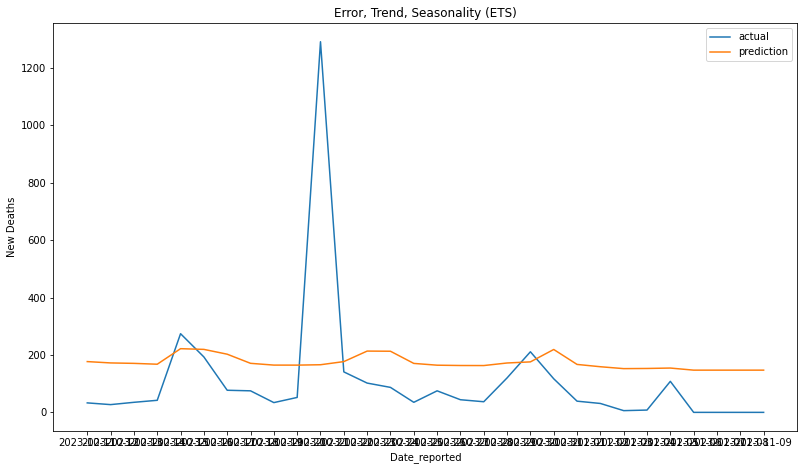

In [7]:
fig, ax = plt.subplots(1,1, figsize=(1280/96, 720/96))
ax.plot(date[-30:],test[target_column].values, label='actual')
ax.plot(date[-30:], pred, label='prediction')
ax.set_title('Error, Trend, Seasonality (ETS)')
ax.set_ylabel('New Deaths')
ax.set_xlabel(date_column)
ax.legend()
plt.show()

In [8]:
test[target_column].mean()
rmse=sqrt(mean_squared_error(pred,test[target_column]))
print(rmse)


235.52123722333587
